In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import os 

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

import warnings

sys.path.append(os.path.abspath("../"))

from src.Components.Data_ingestion import TypeFile

In [2]:
df = TypeFile().Ingest("/home/amine/Desktop/Projects/endtoend_DS_withdeploy/Notebook/Data/stud.csv")

In [3]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
x = df.drop(columns=['math_score'], axis=1)

y = df['math_score']

In [5]:
num_col = x.select_dtypes(exclude='object').columns

cat_col = x.select_dtypes(include= 'object').columns

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
norm = StandardScaler()

Preprocessor = ColumnTransformer(
    
   [ ('OneHotEncoder', one_hot, cat_col),
    
    ('StandardScaler', norm, num_col)]
)

In [8]:
x = Preprocessor.fit_transform(x)

In [9]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 0, shuffle= True)

In [11]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((750, 19), (250, 19), (750,), (250,))

In [12]:
Models = {
    
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "Lasso": Lasso(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "Ridge": Ridge(),
    "svm": SVR()
    
}

In [13]:
def compute_loss(y_true, y_pred):
    
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    return r2, mae ,mse

In [14]:
r2_list = []

In [15]:
for name, model in Models.items():
    
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)
        
    print(f'\n Model {name} ==> ')
    print('\n Model Performance on Trainig set')
    
    r2, mae, mse = compute_loss(y_train, y_train_pred)
    print(f'\n r square: {r2}, mean absolute error: {mae}, mean square error: {mse}')
    
    print('\n Model Performance on Testing set')
    
    r2, mae, mse = compute_loss(y_test, y_pred)
    print(f'\n r square: {r2}, mean absolute error: {mae}, mean square error: {mse}')
    
    r2_list.append(r2)
    


 Model Decision Tree ==> 

 Model Performance on Trainig set

 r square: 0.9999885726649873, mean absolute error: 0.0026666666666666666, mean square error: 0.0026666666666666666

 Model Performance on Testing set

 r square: 0.6971388200077596, mean absolute error: 6.532, mean square error: 65.996



 Model RandomForestRegressor ==> 

 Model Performance on Trainig set

 r square: 0.9763309195944953, mean absolute error: 1.846592, mean square error: 5.523382982814813

 Model Performance on Testing set

 r square: 0.8384034235414244, mean absolute error: 4.824418666666666, mean square error: 35.21325400711111

 Model Lasso ==> 

 Model Performance on Trainig set

 r square: 0.8133528310013678, mean absolute error: 5.212322800883509, mean square error: 43.55571823558654

 Model Performance on Testing set

 r square: 0.7897562098294368, mean absolute error: 5.350193826285393, mean square error: 45.81389128990378

 Model AdaBoostRegressor ==> 

 Model Performance on Trainig set

 r square: 0.8523959598551356, mean absolute error: 4.767726930099482, mean square error: 34.444669144866744

 Model Performance on Testing set

 r square: 0.7997792176226544, mean absolute error: 5.279559677316007, mean square error: 43.62979353812812

 Model LinearRegression ==> 

 Model Performance on Traini

In [16]:
pd.DataFrame(list(zip(Models, r2_list)), columns=['Model', 'R2 Square']).sort_values(by=['R2 Square'], ascending=False)

,Model,R2 Square
8,Ridge,0.852477
4,LinearRegression,0.852204
1,RandomForestRegressor,0.838403
7,CatBoostRegressor,0.837211
3,AdaBoostRegressor,0.799779
6,XGBRegressor,0.797708
2,Lasso,0.789756
5,KNeighborsRegressor,0.776142
9,svm,0.770577
0,Decision Tree,0.697139


In [17]:
model = Ridge(fit_intercept= True)

model.fit(x_train, y_train)

y_p = model.predict(x_test)

score = r2_score(y_test, y_p) * 100

print(f'{score=}%')

score=85.24773137581975%


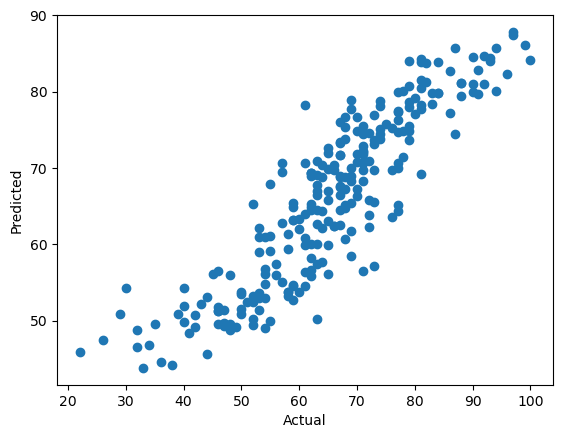

In [18]:
plt.scatter(y_test, y_pred, )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math_score'>

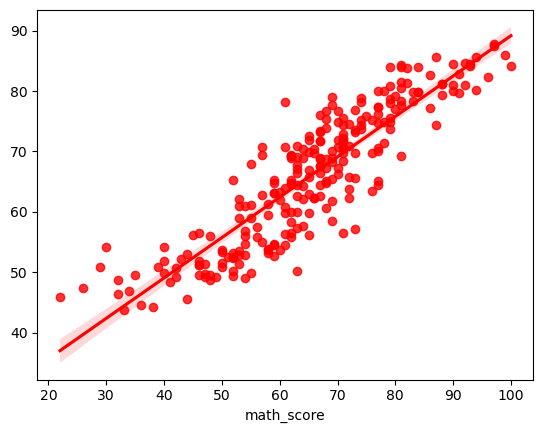

In [19]:
sns.regplot(x= y_test, y= y_pred, color='r')

In [ ]:
pd = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_p, 'Deffirence':y_test - y_p})

In [21]:
pd

,Actual value,Predicted value,Deffirence
993,62,62.368880,-0.368880
859,87,75.231574,11.768426
298,40,48.592588,-8.592588
553,77,66.383568,10.616432
672,69,69.646723,-0.646723
...,...,...,...
462,71,72.663662,-1.663662
356,63,66.887122,-3.887122
2,90,84.729805,5.270195
478,55,58.912522,-3.912522
